In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from scipy.io import loadmat

In [48]:
data=loadmat('ex3data1.mat')
data

{'X': array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 'y': array([[10],
        [10],
        [10],
        ..., 
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [49]:
X=data['X']
y=data['y']

In [50]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3750, 400) (1250, 400) (3750, 1) (1250, 1)


In [51]:
from sklearn.preprocessing import OneHotEncoder  
encoder = OneHotEncoder(sparse=False)  
y_train1= encoder.fit_transform(y_train)
print(y_train1.shape)

(3750, 10)


(-0.5, 399.5, 19.5, -0.5)

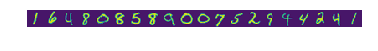

In [52]:
sample = np.random.choice(X.shape[0], 20)
plt.imshow(X[sample,:].reshape(-1,20).T)
plt.axis('off')

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [53]:
classifier=Sequential()
classifier.add(Dense(input_dim=400,output_dim=25,kernel_initializer='uniform',activation='sigmoid'))
classifier.add(Dense(output_dim=25,kernel_initializer='uniform',activation='sigmoid'))
classifier.add(Dense(output_dim=10,kernel_initializer='uniform',activation='sigmoid'))

C:\Users\Himanshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=400, kernel_initializer="uniform", activation="sigmoid", units=25)`
  
C:\Users\Himanshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="sigmoid", units=25)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Himanshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="sigmoid", units=10)`
  after removing the cwd from sys.path.


In [55]:
#compiling
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
classifier.fit(X_train,y_train1,batch_size=10,nb_epoch=100)

C:\Users\Himanshu\Anaconda3\lib\site-packages\keras\models.py:874: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
3750/3750 [==============================] - 2s 433us/step - loss: 0.3643 - acc: 0.8937
Epoch 2/100
3750/3750 [==============================] - 1s 212us/step - loss: 0.3258 - acc: 0.9000
Epoch 3/100
3750/3750 [==============================] - 1s 209us/step - loss: 0.3256 - acc: 0.9000
Epoch 4/100
3750/3750 [==============================] - 1s 271us/step - loss: 0.3259 - acc: 0.9000
Epoch 5/100
3750/3750 [==============================] - 1s 261us/step - loss: 0.3258 - acc: 0.9000
Epoch 6/100
3750/3750 [==============================] - 1s 223us/step - loss: 0.3256 - acc: 0.9000
Epoch 7/100
3750/3750 [==============================] - 1s 230us/step - loss: 0.3254 - acc: 0.9000 0s - loss: 0.3257 - ac
Epoch 8/100
3750/3750 [==============================] - 1s 230us/step - loss: 0.3169 - acc: 0.9000
Epoch 9/100
3750/3750 [==============================] - 1s 222us/step - loss: 0.2902 - acc: 0.9000
Epoch 10/100
3750/3750 [==============================] - 1s 262us/step - los

In [63]:
y_pred1=classifier.predict_classes(X_test)
y_pred=classifier.predict(X_test)
y_pred1.shape

1250/1250 [==============================] - 0s 36us/step


(1250,)

In [68]:
y_pred1[0]

9

In [71]:
for i in range(1250):
    y_pred1[i]+=1
y_pred1

array([10,  1,  9, ..., 10,  1,  4], dtype=int64)

In [72]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_pred1,y_test))

             precision    recall  f1-score   support

          1       0.96      0.95      0.96       126
          2       0.89      0.90      0.90       119
          3       0.94      0.92      0.93       121
          4       0.89      0.93      0.91       109
          5       0.93      0.88      0.90       146
          6       0.92      0.91      0.92       116
          7       0.95      0.89      0.92       137
          8       0.92      0.92      0.92       140
          9       0.85      0.95      0.90       118
         10       0.95      0.96      0.95       118

avg / total       0.92      0.92      0.92      1250



In [73]:
cm = confusion_matrix(y_pred1, y_test)
cm

array([[120,   0,   0,   2,   1,   1,   1,   0,   1,   0],
       [  0, 107,   3,   2,   2,   3,   1,   1,   0,   0],
       [  0,   2, 111,   0,   3,   0,   2,   1,   2,   0],
       [  0,   1,   0, 101,   0,   1,   1,   0,   5,   0],
       [  2,   1,   1,   3, 128,   2,   0,   5,   2,   2],
       [  1,   0,   0,   3,   1, 106,   0,   1,   1,   3],
       [  0,   2,   3,   2,   1,   0, 122,   0,   7,   0],
       [  2,   5,   0,   0,   1,   0,   1, 129,   1,   1],
       [  0,   1,   0,   1,   1,   0,   0,   3, 112,   0],
       [  0,   1,   0,   0,   0,   2,   1,   0,   1, 113]])

In [80]:
classifier.evaluate(X_test,encoder.fit_transform(y_test))

1250/1250 [==============================] - 0s 104us/step


[0.072211236608028417, 0.98368001308441166]

1.05589124969244